In [1]:
#Author: James MacPhee
#Date: September 6th, 2019
#CSCI4155 Assignment 1

In [2]:
#Q1
#I realize this is a messy way of doing the formatting but I wasn't sure whether we were allowed- 
#to use other libraries such as tabulate, prettyTable, or pandas DataFrames so I just formatted it myself.
import numpy as np

#Making data
nums = np.arange(1,11)
sqr = np.square(nums)
sqrt = np.sqrt(nums)

print("|Number\t|Square\t|Square Root|")
print("|-------|-------|-----------|")
for i in nums:
    print("|" + str(nums[i-1]) + "\t|  " + str(sqr[i-1]) + "\t|  " + "%.3f"%sqrt[i-1] + "    |")


#I will show how I would do it with pandas DataFrame anyways
import pandas as pd

data = np.concatenate(([nums], [sqr], [np.round(sqrt, decimals=3)]))
df = pd.DataFrame(data.T, columns = ["Number", "Square", "Square Root"])
df.set_index('Number', inplace=True)

print()
print(df)

|Number	|Square	|Square Root|
|-------|-------|-----------|
|1	|  1	|  1.000    |
|2	|  4	|  1.414    |
|3	|  9	|  1.732    |
|4	|  16	|  2.000    |
|5	|  25	|  2.236    |
|6	|  36	|  2.449    |
|7	|  49	|  2.646    |
|8	|  64	|  2.828    |
|9	|  81	|  3.000    |
|10	|  100	|  3.162    |

        Square  Square Root
Number                     
1.0        1.0        1.000
2.0        4.0        1.414
3.0        9.0        1.732
4.0       16.0        2.000
5.0       25.0        2.236
6.0       36.0        2.449
7.0       49.0        2.646
8.0       64.0        2.828
9.0       81.0        3.000
10.0     100.0        3.162


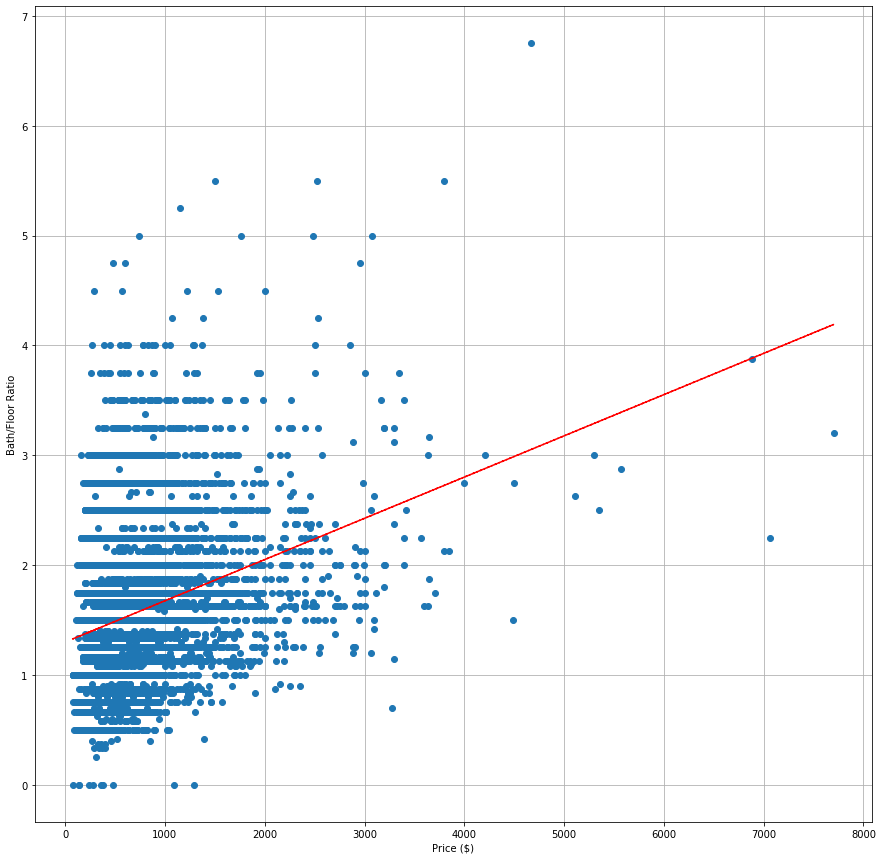

In [4]:
#Q2
import matplotlib.pyplot as plt

houses = pd.read_csv("houses.csv")

#Grabbing needed data as pandas.Series
price = houses[houses.columns[0]]
baths = houses[houses.columns[2]]
floors = houses[houses.columns[5]]

#Finding bath/floors ratio
ratio = baths.divide(floors)

#Plotting ratio against house price
plt.figure(figsize=(15,15))
plt.plot(price, ratio, 'o')
plt.ylabel('Bath/Floor Ratio')
plt.xlabel('Price ($)')
plt.grid()

#Plotting trendline
z = np.polyfit(price, ratio, 1)
p = np.poly1d(z)
plt.plot(price, p(price),"r--")
plt.show()

From the plot above (especially with the trendline) it is easy to say that, yes the ratio of bathrooms-to-floors does increase along with the price of the house.

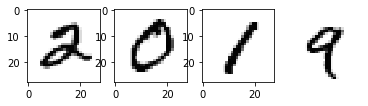

In [81]:
#Q3
mnist = pd.read_csv('mnist_784.csv')

#Simply selecting the first occurrence of each (2, 0 ,1, 9) class
two = mnist[mnist['class'] == 2].head(1)
zero = mnist[mnist['class'] == 0].head(1)
one = mnist[mnist['class'] == 1].head(1)
nine = mnist[mnist['class'] == 9].head(1)

#Making them all one DataFrame then making it the proper dimension
mnist2 = two.append([zero, one, nine])
mnist2 = mnist2.drop(columns='class').values

#Converting from DataFrame to 28x28 2d array/list for inputting into pyplot.imshow() 
mnist3 = []
for i in range(4):
    mnist3.append(np.split(mnist2[i],28))

#Plotting/Printing images
fig, axs = plt.subplots(1, 4)
for i in range(4):
    axs[i].axis('off')
    axs[i].imshow(mnist3[i], cmap='Greys')

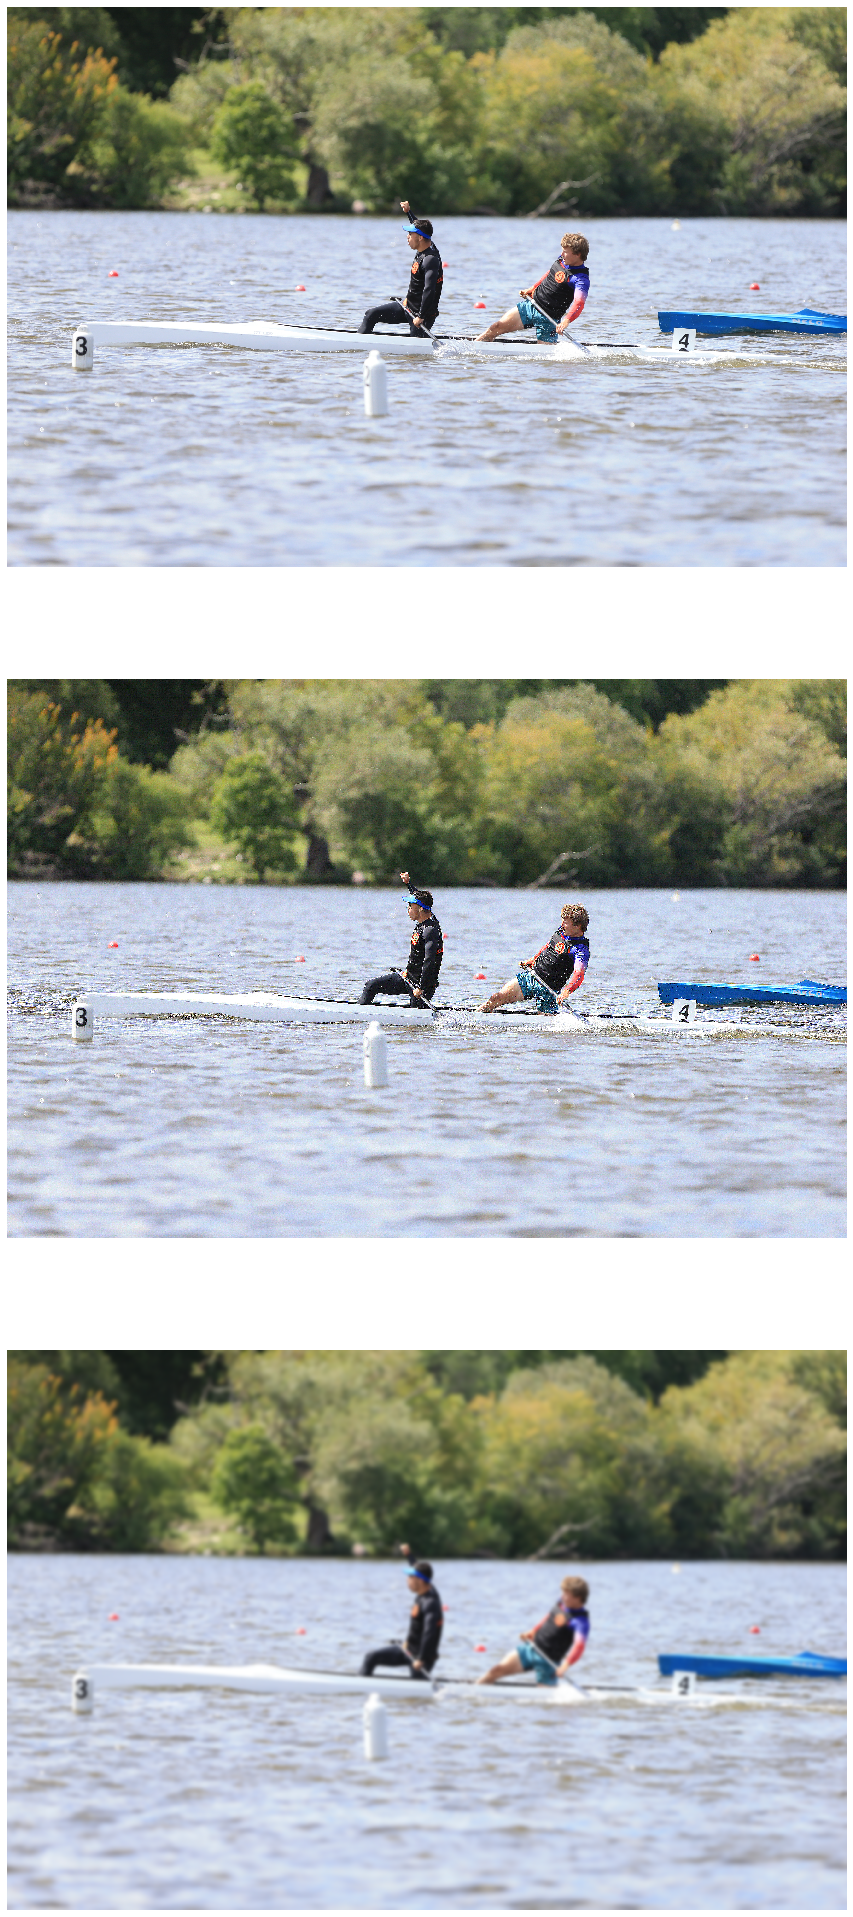

In [91]:
#Q4 
from PIL import Image, ImageFilter

fig2, axs2 = plt.subplots(3, 1, figsize=(35,35))

#Importing a picture I had instead of taking one
myImage = Image.open('self_image.jpg')
axs2[0].axis('off')
axs2[0].imshow(myImage)

#Applying Edge filter
#I choose to use EDGE_ENHANCE_MORE because EDGE_ENHANCE didn't change this image much
edgeImage = myImage.filter(ImageFilter.EDGE_ENHANCE_MORE)
axs2[1].axis('off')
axs2[1].imshow(edgeImage)

#Applying Gaussinan Blur filter
blurImage = myImage.filter(ImageFilter.GaussianBlur(radius = 10))
axs2[2].axis('off')
axs2[2].imshow(blurImage)

